<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
goalkeeper
</font>
</h1>

<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
In this exercise, we want to use the Cross framework to train a deep neural network that will help the goalkeeper of the French national team to successfully throw the ball into the middle of the field. Of course, our neural network is large and our data is small! As a result, the network will normally overfit. But we will not give up and try to prevent overfitting of the model by using the regularization techniques we learned and provide the goalkeeper with as much help as possible.

Problem Description
Deep learning models usually have a large number of parameters and, as a result, have a high potential and ability to learn. Such potential requires a large amount of training data to occur, and if the amount of data available to the model is small, the model will most likely overfit on them. That is, the model will perform very well on the training data, but will not be able to generalize what it has learned to new and previously unseen examples. In this exercise, we will see this in action and apply some regularization techniques to prevent overfitting of the model.
Our problem is that the goalkeeper of the French national team wants to throw the ball into the middle of the field so that one of the home players can head it. For example, in the figure below, you can see a soccer field that shows how the goalkeeper throws the ball and the positions of the players. Information about all throws in the past 10 games of the French national team is available to you and we plan to train a model that can predict whether the ball will reach the home player or not. Finally, using the model, we can improve the goalkeeper's throws in future exercises.
</font>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_train_x = np.load('data\data_X.npy')
data_train_y = np.load('data\data_y.npy')
data_eval_x = np.load('data\data_Xval.npy')
data_eval_y = np.load('data\data_yval.npy')

# چاپ ابعاد داده‌ها
print(data_train_x.shape, data_train_y.shape, data_eval_x.shape, data_eval_y.shape)

(211, 2) (211, 1) (200, 2) (200, 1)


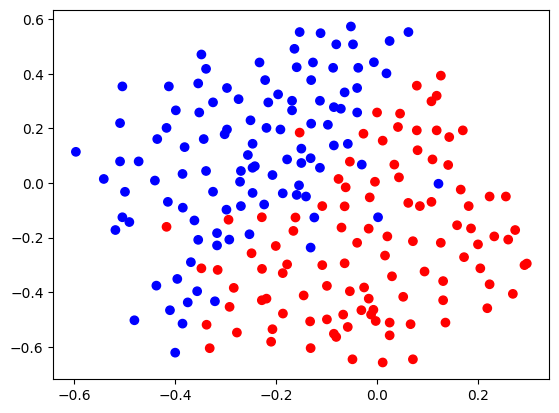

In [2]:
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors)

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Data Analysis</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
As can be seen from the above graph, although the samples are a bit noisy, a diagonal line separating the upper left (blue) and lower right (red) regions seems to be a very good answer.
First, let’s build a model without any regularization and see what happens if the dataset is simple and small but the model has a high learning capacity. Then, let’s move on to using regularization techniques and see their impact.
Model Without Regularization
Below, we build a neural network with 4 layers, each layer (except the last layer) consisting of 5000 neurons and using the relu activation function. The output layer also has only one neuron (the problem is two-class) and using the sigmoid activation function. It is clear that such a model is very large compared to the data we have, due to the large number of layers and neurons, and there is a possibility of overfitting.
</font>
</p>

In [ ]:
# !pip install keras --upgrade
# uncomment the above line if you don't have keras 3 installed

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [5]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(data_train_x, data_train_y,
                    epochs=500, batch_size=32,
                    validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.7174 - loss: 0.5366 - val_accuracy: 0.8750 - val_loss: 0.4735
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.9133 - loss: 0.2364 - val_accuracy: 0.9150 - val_loss: 0.3403
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.9000 - loss: 0.2477 - val_accuracy: 0.8950 - val_loss: 0.3232
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - accuracy: 0.8874 - loss: 0.2684 - val_accuracy: 0.9200 - val_loss: 0.3157
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.9383 - loss: 0.1988 - val_accuracy: 0.9100 - val_loss: 0.3821
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 0.9185 - loss: 0.2242 - val_accuracy: 0.9300 - val_loss: 0.2772
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.9064 - loss: 0.2222 - val_accuracy: 0.9150 - val_loss: 0.3407
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.9045 - loss: 0.1986 - val_accuracy: 0.9300 - v

In [7]:
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle('Training and Validation Metrics')
    
    # Loss plot
    axs[0].plot(epochs, train_loss, label='Training loss', c='red')
    axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_ylim([0, 1.5])
    
    # Accuracy plot
    axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
    axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

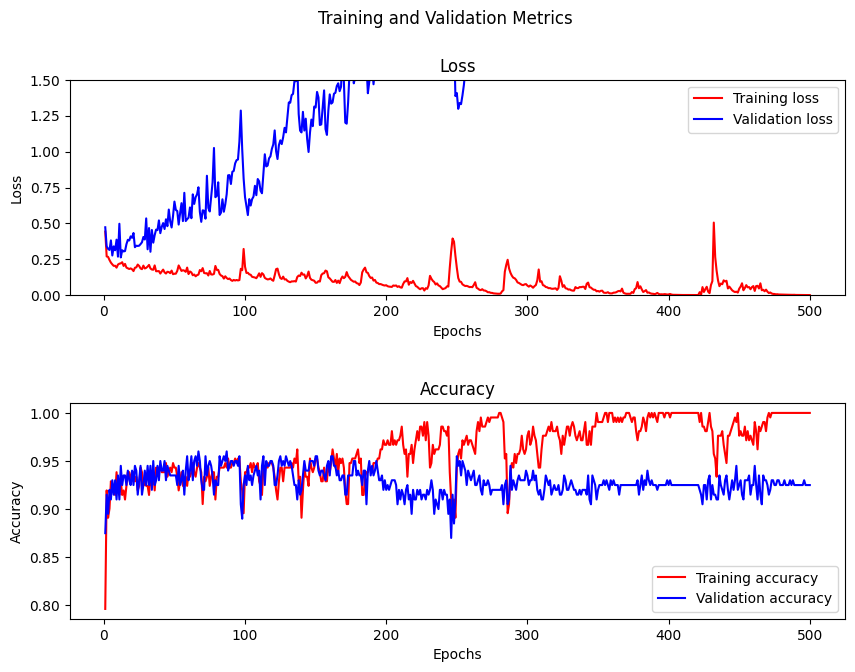

In [8]:
plot_loss_acc(history)

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def get_decision_boundaries(model, xmin, xmax, ymin, ymax, steps):
  x_span = np.linspace(xmin, xmax, steps)
  y_span = np.linspace(ymin, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)
  points = (np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32))

  z = (model.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).reshape(xx.shape)

  return xx, yy, z

def plt_decision_boundaries(model, x_min, x_max, y_min, y_max, steps):
  plt.figure(figsize=(6, 4))
  xx, yy, z = get_decision_boundaries(model, x_min, x_max, y_min, y_max, steps)
  plt.contourf(xx, yy, z, alpha=0.2, cmap=matplotlib.colors.ListedColormap(["C1", "C0"]));


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


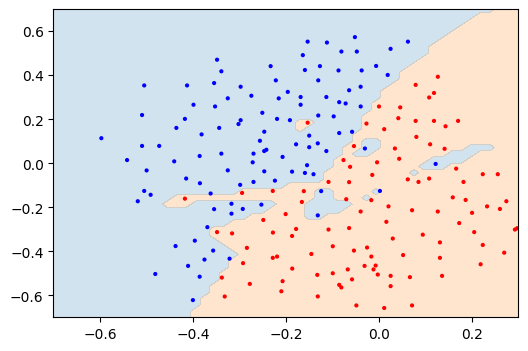

In [10]:
plt_decision_boundaries(model, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Random deletion technique</font>
</h2>



In [11]:
model_dropout = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),  # افزودن لایه Dropout با نرخ 0.6
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),  # افزودن لایه Dropout با نرخ 0.6
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dropout(0.6),  # افزودن لایه Dropout با نرخ 0.6
    keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model_dropout.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model_dropout.fit(data_train_x, data_train_y,
                            epochs=500, batch_size=32,
                            validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.7356 - loss: 0.5747 - val_accuracy: 0.8850 - val_loss: 0.5222
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.8940 - loss: 0.3799 - val_accuracy: 0.9100 - val_loss: 0.3896
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.9375 - loss: 0.2058 - val_accuracy: 0.9250 - val_loss: 0.3403
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.9257 - loss: 0.2154 - val_accuracy: 0.9000 - val_loss: 0.3380
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.9293 - loss: 0.2166 - val_accuracy: 0.9200 - val_loss: 0.2904
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.9012 - loss: 0.2313 - val_accuracy: 0.8950 - val_loss: 0.3648
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - accuracy: 0.9116 - loss: 0.2313 - val_accuracy: 0.8950 - val_loss: 0.3320
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.8806 - loss: 0.3172 - val_accuracy: 0.8950 - v

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

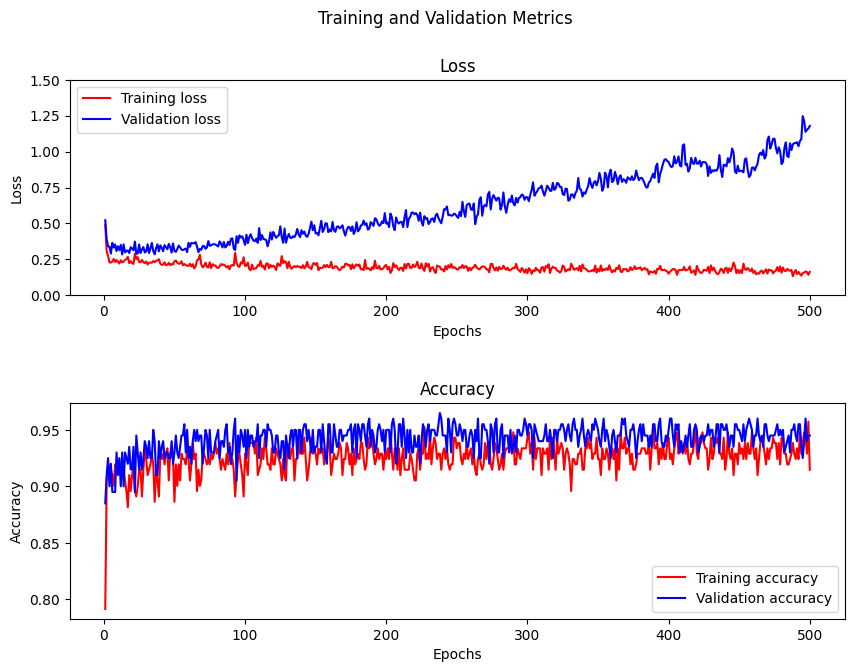

In [15]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


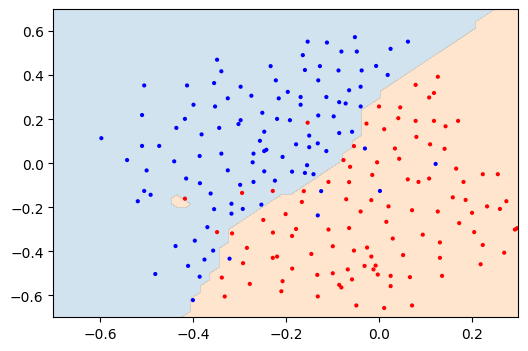

In [16]:
plt_decision_boundaries(model_dropout, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 <i>L1</i>  <i>L2</i>
</font>
</h2>


In [17]:
from keras import regularizers

model_l1l2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu', 
                       kernel_regularizer=regularizers.L1L2(l1=3e-5, l2=3e-4)),  # افزودن رگولاریزر L1L2
    keras.layers.Dense(5000, activation='relu', 
                       kernel_regularizer=regularizers.L1L2(l1=3e-5, l2=3e-4)),  # افزودن رگولاریزر L1L2
    keras.layers.Dense(5000, activation='relu', 
                       kernel_regularizer=regularizers.L1L2(l1=3e-5, l2=3e-4)),  # افزودن رگولاریزر L1L2
    keras.layers.Dense(1, activation='sigmoid', 
                       kernel_regularizer=regularizers.L1L2(l1=3e-5, l2=3e-4))  # افزودن رگولاریزر L1L2
])

In [18]:
model_l1l2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model_l1l2.fit(data_train_x, data_train_y,
                         epochs=500, batch_size=32,
                         validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 811ms/step - accuracy: 0.7322 - loss: 19.4489 - val_accuracy: 0.8150 - val_loss: 11.8901
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.8600 - loss: 10.2013 - val_accuracy: 0.9000 - val_loss: 5.7701
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.8561 - loss: 4.8803 - val_accuracy: 0.9200 - val_loss: 2.7745
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - accuracy: 0.9431 - loss: 2.4656 - val_accuracy: 0.9200 - val_loss: 2.1717
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 665ms/step - accuracy: 0.9428 - loss: 2.0072 - val_accuracy: 0.9200 - val_loss: 1.4837
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - accuracy: 0.9348 - loss: 1.3240 - val_accuracy: 0.9100 - val_loss: 1.0874
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 683ms/step - accuracy: 0.8992 - loss: 1.0360 - val_accuracy: 0.9200 - val_loss: 0.8267
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - accuracy: 0.9075 - loss: 0.7913 - val_accuracy: 0.9050 

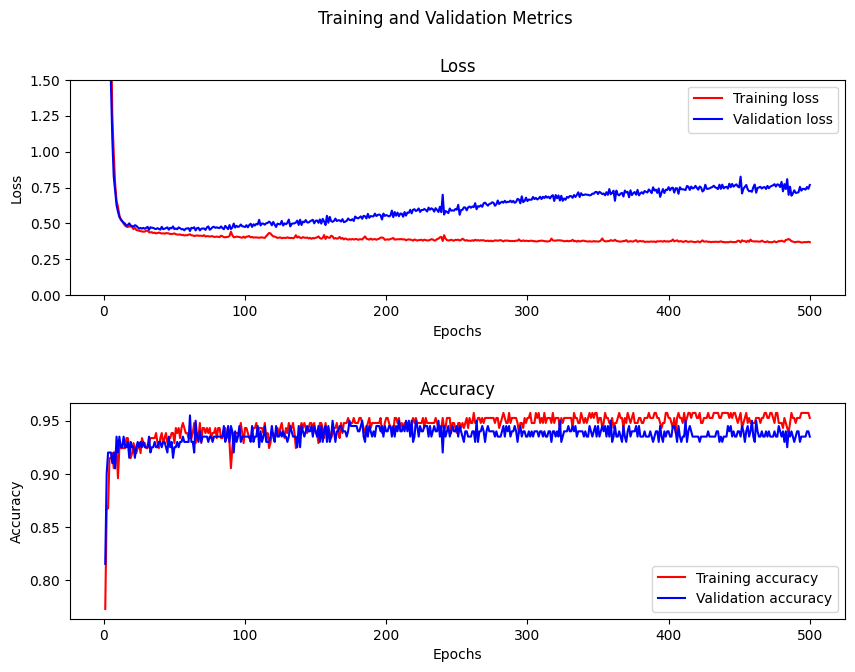

In [20]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


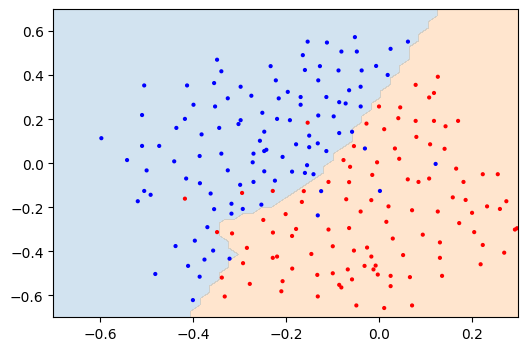

In [21]:
plt_decision_boundaries(model_l1l2, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

In [22]:
import numpy as np
import json

def get_kernel_regularizer_info(layer):
  try:
      con = layer.get_config()['kernel_regularizer']
      con['config']['l1']=round(con['config']['l1'], 6)
      con['config']['l2']=round(con['config']['l2'], 6)
      return str(con)
  except:
      return ""

model_l1l2_info=[]
for layer in model_l1l2.layers:
  if layer.__class__.__name__=="Dense":
    model_l1l2_info.append({
        "name": layer.__class__.__name__,
        "units":layer.units,
        "activation":layer.get_config()["activation"],
        "kernel_regularizer": get_kernel_regularizer_info(layer)
    })
  elif layer.__class__.__name__=="Dropout":
    model_l1l2_info.append({
        "name": layer.__class__.__name__,
        "trainable":layer.get_config()["trainable"],
        "rate": layer.get_config()["rate"],
    })
  else:
    model_l1l2_info.append({"name": layer.__class__.__name__})

with open("model_l1l2_info.json", "w") as f:
    json.dump(model_l1l2_info, f)

model_dropout_info=[]
for layer in model_dropout.layers:
  if layer.__class__.__name__=="Dense":
    model_dropout_info.append({
        "name": layer.__class__.__name__,
        "units":layer.units,
        "activation":layer.get_config()["activation"],
        "kernel_regularizer": get_kernel_regularizer_info(layer)
    })
  elif layer.__class__.__name__=="Dropout":
    model_dropout_info.append({
        "name": layer.__class__.__name__,
        "trainable":layer.get_config()["trainable"],
        "rate": layer.get_config()["rate"],
    })
  else:
    model_dropout_info.append({"name": layer.__class__.__name__})

with open("model_dropout_info.json", "w") as f:
    json.dump(model_dropout_info, f)

In [ ]:
import zipfile
import joblib

if not os.path.exists(os.path.join(os.getcwd(), 'goalkeeper.ipynb')):
    %notebook -e goalkeeper.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ['model_l1l2_info.json', 'model_dropout_info.json', 'goalkeeper.ipynb']
compress(file_names)